In [1]:
import numpy as np
from math import comb
from scipy.stats import binom
import matplotlib.pyplot as plt

### Dicussion Question
You throw a coin $5$ times and obtain $5$ Heads ($X_1 = 1, \ X_2 = 1, \ldots, X_5 = 1$). What is $\theta := \mathbb{P}[\text{heads}]$? Or, specifically, what would the Frequentist approach suggest here (*i.e.*, what is the unbiased estimate of $\theta$ that we learned early in this course)?

**Answer**

In [3]:
theta_hat = 5/5 #number of successes 's' divided by number of trials 'n'
print(f'theta_hat = {theta_hat}')

theta_hat = 1.0


#### Question
If the truth was $\theta = 0.9$, what is the probability that we will see $5$ heads in a row? Interpret the result.

#### Answer

In [4]:
print("The chance is", round(0.9 ** 5,2), \
      "hence there is almost 60% chance that the frequentist estimation of theta will be = 1")

The chance is 0.59 hence there is almost 60% chance that the frequentist estimation of theta will be = 1


#### Recall the Maximum Likelihood Estimate
We have $$L(x; \theta) = p(X_1 = 1, \ X_2 = 1, \ldots, X_5 = 1 | \theta) = \prod \theta^5  $$
hence the $\theta$ that maximizes the likelihood is $\theta = 1$.

### Question
For a coin with $\mathbb{P}[\text{head}] = \theta$, what is the probability of having $s$ heads out of $n$ (independent) flips? (Recall the Binomial distribution.) Compute this value for $n=10$, $s = 3$, $\theta = 0.6$.

#### Answer
$ \mathbb{P}[\sum_{i=1}^n X_i] = \displaystyle{n \choose{s}} \theta^s (1- \theta)^{n-s} $

In [5]:
# compute yourself
n = 10
s = 3
theta = 0.6
likelihood = comb(n,s)*(theta**s)*((1-theta)**(n-s)) #The math.comb(n,k) method returns the number of ways picking k unordered outcomes from n possibilities, without repetition, also known as combinations.
#Note: The parameters passed in this method must be positive integers.
round(likelihood,4)

0.0425

In [6]:
# use SciPy
round(binom.pmf(s, n, theta),4) #The binom.pmf(s, n, theta) function calculates the probability of observing exactly s successes in n trials when the success rate for each trial is theta, assuming a binomial distribution.

0.0425

### Bayesian Approach:
Given that we have $s$ Heads in total, out of $n$ flips, we would like to find a probability distribution for $\theta \in [0,1]$, denoted $f(\theta)$. 

The major 'philosophy' is to assume that $f(\theta)$ is proportional to the likelihood of data under $\theta$, that is, if a $\theta$ value obtains a 'likelihood' that is greater than or equal to the likelihood of $\theta'$, then $f(\theta)$ should be greater than or equal to $f(\theta)$. We should thus have
$$f(\theta) \propto  \displaystyle{n \choose{s}} \theta^s (1- \theta)^{n-s},$$
where $\propto$ denotes 'proportional to', so there exists some constant $C$, that does not depend on $\theta$, so that 
$$f(\theta)  =  \displaystyle C \cdot {n \choose{s}} \theta^s (1- \theta)^{n-s},$$

#### Question
Find an expression for the value of $C$. (Hint: $\mathbb{P}[\theta]$ should integrate to $1$).

#### Answer
$$ C = \dfrac{1}{\displaystyle \int_{\theta \in [0,1]} {n \choose{s}} \theta^s (1- \theta)^{n-s} \mathrm{d} \theta}$$

### Bayesian Approach (continued):
It turns out that after simplification we have:
$$f(\theta) = \dfrac{\theta^s (1- \theta)^{n-s}}{\displaystyle \int_{\theta \in [0,1]} \theta^s (1- \theta)^{n-s} \mathrm{d} \theta} $$

#### Question
Compute the denominator of $f(\theta)$, that is, find an expression for $\displaystyle \int_{\theta \in [0,1]} \theta^s (1- \theta)^{n-s} \mathrm{d} \theta$. 

(Hint: Use Euler's Beta function that says $\int_{x \in [0,1]} x^a (1-x)^b \mathrm{d}x = \dfrac{a! b!}{(a+b+1)!}$)

#### Answer
Simply from definition we have $\dfrac{s! (n-s)!}{(n+1)!}$

### Bayesian Approach (continued):
If we plug the answer of the previous question in the definition of $f(\theta)$, and apply a little bit algebra, we have
$$f(\theta) = (n+1) {n \choose s} \theta^s (1-\theta)^{n-s}. $$

#### Question: 
Plot $f(\theta)$ for the sequences:
- 3 heads out of 3 flips
- 5 heads out of 5 flips
- 9 heads out of 10 flips
- 2 heads out of 10 flips

#### Answer:

In [7]:
def density_theta(n,s, theta):
    return (n+1)*comb(n,s)*(theta**s)*((1-theta)**(n-s)) # implement the Bayesian approach above

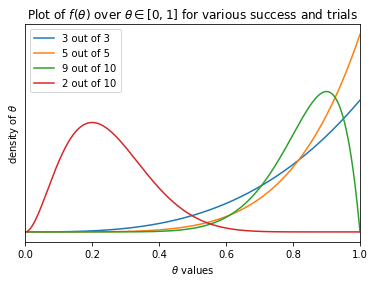

In [89]:
divide = 1000

thetas = np.linspace(0, 1, divide)

#1
C1 = np.array(list(map(density_theta,3*np.ones(divide).astype(int),3*np.ones(divide).astype(int), thetas)))

#2
C2 = np.array(list(map(density_theta,5*np.ones(divide).astype(int),5*np.ones(divide).astype(int), thetas)))

#3
C3 = np.array(list(map(density_theta,10*np.ones(divide).astype(int),9*np.ones(divide).astype(int), thetas)))

#4
C4 = np.array(list(map(density_theta,10*np.ones(divide).astype(int),2*np.ones(divide).astype(int), thetas)))


plt.plot(thetas, C1, label='3 out of 3')
plt.plot(thetas, C2, label='5 out of 5')
plt.plot(thetas, C3, label='9 out of 10')
plt.plot(thetas, C4, label='2 out of 10')
plt.yticks([])

plt.xlabel(r'$\theta$ values')
plt.ylabel(r'density of $\theta$')
plt.title(r"Plot of $f(\theta)$ over $\theta \in [0,1]$ for various success and trials")
plt.yticks()
plt.xlim([0,1])
plt.legend()
plt.show()

#### Question
Given $f(\theta)$ as we derived above, if you see $s$ Heads out of $n$ trials, what is the probability that you will have a Head in the next ($n+1$-th) flip? By the law of total probability, we have:
\begin{align}\mathbb{P}[\text{Head on $n+1$-th flip} \ | \ \text{$s$ Heads out of $n$ flips previously}] & =  
\int_{x \in [0,1]} \mathbb{P}[\text{Heads} \ | \ \theta] \cdot f(\theta) \mathrm{d} \theta \\ 
& = \int_{x \in [0,1]} \theta \cdot f(\theta) \mathrm{d} \theta \\ 
& = \mathbb{E}[\theta] = \color{red}{\dfrac{s+1}{n+2}}.
\end{align}

#### Extra: 
In the end we replaced the expectation of $\theta$ immediately however this is not immediate (although quite simple). In the integration before, we first plug in the expression for $f(\theta)$ and have:
\begin{align}
\int_{x \in [0,1]} \theta \cdot f(\theta) \mathrm{d} \theta  = \int_{x \in [0,1]} \theta \cdot (n+1) {n \choose s} \theta^s (1-\theta)^{n-s} \mathrm{d} \theta 
\end{align}
Taking constants out gives
\begin{align}
(n+1) {n \choose s}  \int_{x \in [0,1]} \theta^{s+1} (1-\theta)^{n-s} \mathrm{d} \theta.
\end{align}
By the Euler's function (discussed before) we have $\int_{x \in [0,1]} \theta^{s+1} (1-\theta)^{n-s} \mathrm{d} \theta = \dfrac{(s+1)!(n-s)!}{(n+2)!}$, hence the above integration is
\begin{align}
(n+1) {n \choose s}  \dfrac{(s+1)!(n-s)!}{(n+2)!}
\end{align}
And by the definition of combinations and factorials:
\begin{align}
& (n+1) {n \choose s}  \dfrac{(s+1)!(n-s)!}{(n+2)!}\\
= & \color{orange}{(n+1)} \dfrac{\color{red}{n!}}{\color{blue}{(n-s)!} s!}  \dfrac{(s+1)!\color{blue}{(n-s)!}}{(n+2)\color{orange}{(n+1)}\color{red}{n!}} \\
= & \dfrac{(s+1)!}{s! (n+2)} \\
= & \dfrac{s+1}{n+2}.
\end{align} 

#### Discussion
The final equation $\mathbb{E}[\theta] =\dfrac{s+1}{n+2}$ is called *Laplace Rule of Succession*. Here, the estimation of the true $\theta$, when we have $s$ successes out of $n$ trials, is given as $(s+1)/(n+2)$. Discuss how this is similar/different than the MLE or unbiased estimation of $\theta$. 

#### Optional Question:
If you were Laplace, what would your answer be to the question:
- What is the probability that the sun will rise tomorrow?